In [1]:
# --- 1. Imports and Data Loading ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using a relative path to access the data file in the parent directory
df_sales = pd.read_csv('../train.csv')

In [2]:
# --- 2. Data Preparation ---
# Convert 'Order Date' column to datetime objects, specifying day is first
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], dayfirst=True)

# Set the 'Order Date' as the DataFrame's index to enable time-series functionalities
df_sales.set_index('Order Date', inplace=True)

In [3]:
# --- 3. Time-Series Resampling ---
# Resample the data by Quarter End ('QE') and aggregate by summing the 'Sales'
# This creates a new Series with quarterly total sales
quarterly_sales = df_sales['Sales'].resample('QE').sum()

# Convert the resulting Series to a DataFrame for easier plotting with Seaborn
df_quarterly = quarterly_sales.reset_index()

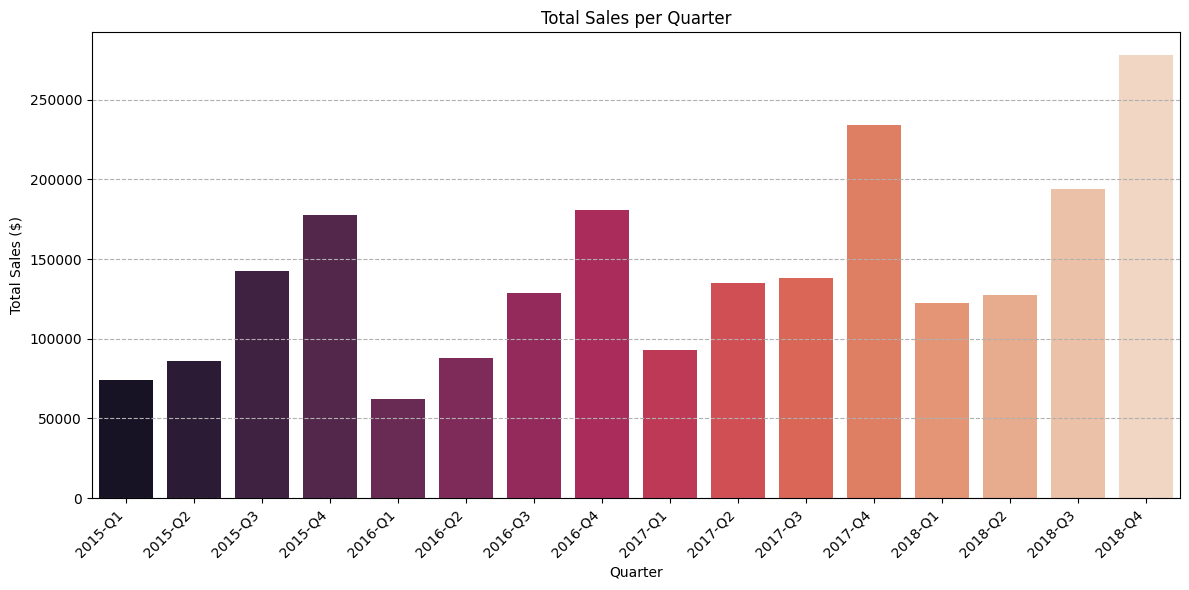

In [7]:
# --- 4. Visualization ---
plt.figure(figsize=(12, 6))

# WHY: Using Seaborn's barplot is often cleaner for plotting from DataFrames.
# It automatically handles the axis labels and bar widths.
sns.barplot(data=df_quarterly, x='Order Date', y='Sales', hue='Order Date', palette='rocket', legend=False)

# Your custom label logic was excellent, let's keep and refine it
plt.title('Total Sales per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')

# Creating more professional and readable x-axis labels
quarter_labels = [f"{date.year}-Q{date.quarter}" for date in df_quarterly['Order Date']]
plt.xticks(ticks=range(len(df_quarterly)), labels=quarter_labels, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()